### Dataset Setup & Organization

In [5]:
import os, shutil, random


original_dataset_path = r'E:\Fonixss\archive\data'

#create our organized folders
output_base = 'data'

# Classes to include
classes = ['letter','form','handwritten','advertisement','invoice']

# How many images per split
num_train = 50
num_val   = 15

#  Create directory structure
for split in ['train','val']:
    for cls in classes:
        os.makedirs(os.path.join(output_base,split,cls.capitalize()), exist_ok=True)

# Randomly copy images into train/ and val/
for cls in classes:
    src_folder = os.path.join(original_dataset_path, cls)
    imgs = os.listdir(src_folder)
    random.shuffle(imgs)
    train_imgs = imgs[:num_train]
    val_imgs   = imgs[num_train:num_train+num_val]
    for img in train_imgs:
        shutil.copy(os.path.join(src_folder, img),
                    os.path.join(output_base,'train',cls.capitalize(), img))
    for img in val_imgs:
        shutil.copy(os.path.join(src_folder, img),
                    os.path.join(output_base,'val',cls.capitalize(), img))

print("✅ Dataset organized under `data/train` and `data/val`.")


✅ Dataset organized under `data/train` and `data/val`.


### 2. Image Preprocessing
#### Convert each image to grayscale, resize to 128×128, binarize, normalize, and save as `.npy`.

Processing val: 100%|████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82it/s]


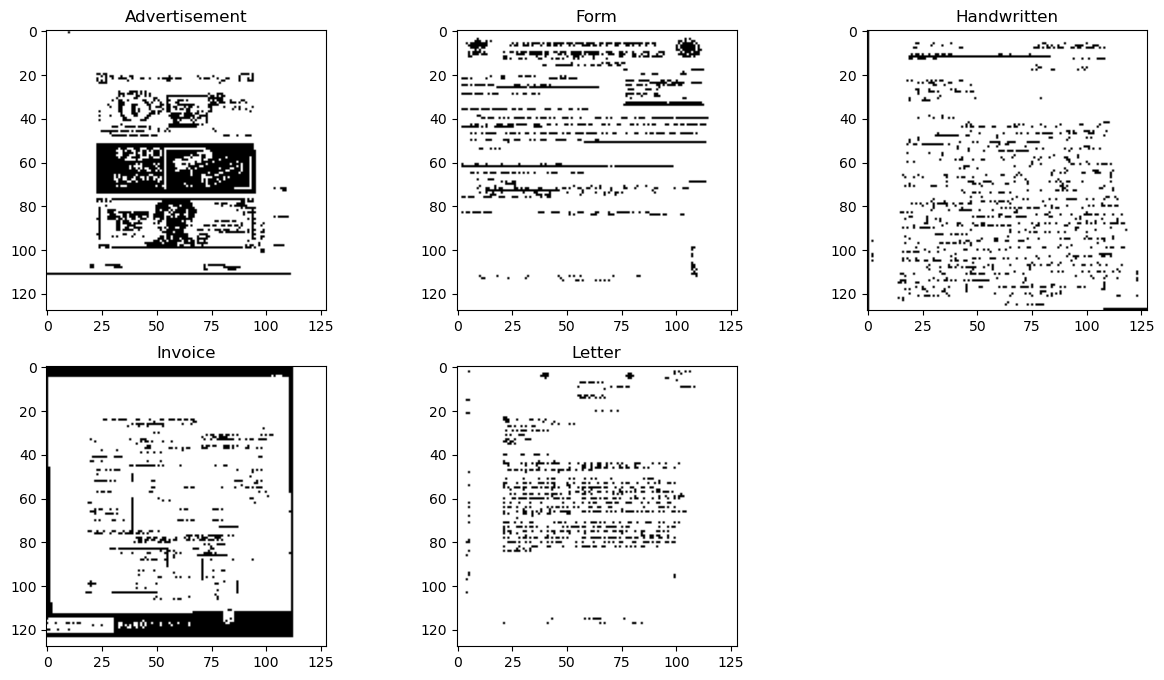

✅ Preprocessing complete!


In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Settings
SIZE = (128, 128)
DATA_DIR = 'data'
PROCESSED_DIR = 'data_np'
CLASSES = ['Advertisement', 'Form', 'Handwritten', 'Invoice', 'Letter']

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, SIZE)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    return img.astype(np.float32) / 255.0

def verify_dataset():
    plt.figure(figsize=(15, 8))
    for i, cls in enumerate(CLASSES):
        sample_path = os.path.join(DATA_DIR, 'train', cls, os.listdir(os.path.join(DATA_DIR, 'train', cls))[0])
        img = preprocess_image(sample_path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(cls)
    plt.show()

# Create processed directories
for split in ['train', 'val']:
    for cls in CLASSES:
        os.makedirs(os.path.join(PROCESSED_DIR, split, cls), exist_ok=True)

# Preprocess and save
for split in ['train', 'val']:
    for cls in tqdm(CLASSES, desc=f'Processing {split}'):
        src_dir = os.path.join(DATA_DIR, split, cls)
        for fname in os.listdir(src_dir):
            img = preprocess_image(os.path.join(src_dir, fname))
            np.save(os.path.join(PROCESSED_DIR, split, cls, fname.replace('.jpg', '.npy')), img)

# Verify
verify_dataset()
print("✅ Preprocessing complete!")

### 3. Model Training

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 3)           │             195 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 1280)                │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,397,803 (16.78 MB)

 Trainable params: 4,355,780 (16.62 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 980ms/step - accuracy: 0.2276 - loss: 2.1125 - val_accuracy: 0.2000 - val_loss: 1.8029
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 482ms/step - accuracy: 0.2071 - loss: 2.0955 - val_accuracy: 0.2000 - val_loss: 1.8393
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 475ms/step - accuracy: 0.2102 - loss: 2.0375 - val_accuracy: 0.2000 - val_loss: 1.8675
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.2511 - loss: 1.9016 - val_accuracy: 0.2000 - val_loss: 1.8849
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 487ms/step - accuracy: 0.2901 - loss: 1.8519 - val_accuracy: 0.2000 - val_loss: 1.9060
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 489ms/step - accuracy: 0.2928 - loss: 1.6747 - val_accuracy: 0.2000 - val_loss: 1.9522
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 468ms/step - accuracy: 0.3014 - loss: 1.6401 - val_accuracy: 0.2000 - val_loss: 1.9710
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - accuracy: 0.3147 - loss: 1.5990 - val_accuracy: 0.2000 - val_loss

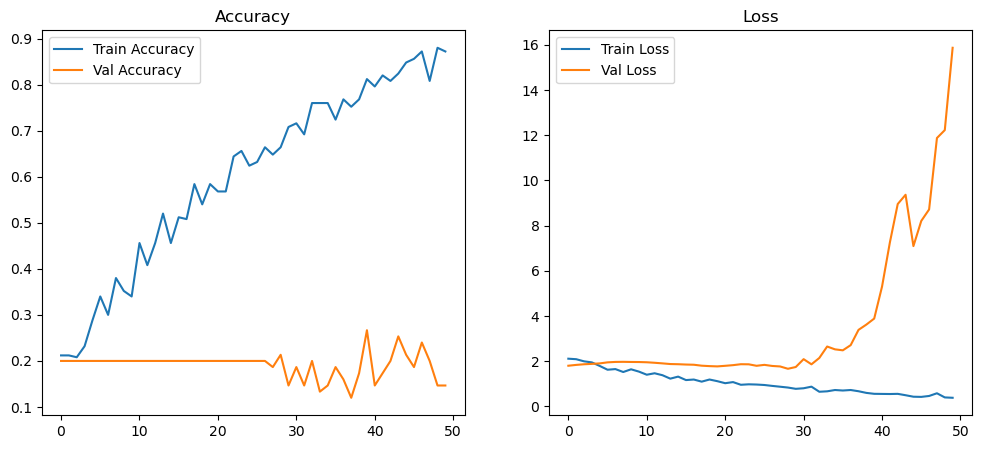

✅ Training complete! Model saved as 'final_model.h5'


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Configuration
BATCH_SIZE = 32
IMG_SIZE = (128, 128)
EPOCHS = 50
CLASSES = ['Advertisement', 'Form', 'Handwritten', 'Invoice', 'Letter']  # Update with your classes
PROCESSED_DIR = 'data_np'  # Update with your processed data path

# Calculate class weights
train_labels = []
for cls_idx, cls in enumerate(CLASSES):
    train_labels.extend([cls_idx]*len(os.listdir(f'{PROCESSED_DIR}/train/{cls}')))
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

# Data pipeline
def create_dataset(split):
    X, y = [], []
    for cls_idx, cls in enumerate(CLASSES):
        cls_dir = f'{PROCESSED_DIR}/{split}/{cls}'
        for fname in os.listdir(cls_dir):
            X.append(np.load(os.path.join(cls_dir, fname)))
            y.append(cls_idx)
    X = np.expand_dims(np.array(X), -1)  # Add channel dimension
    y = tf.keras.utils.to_categorical(y, num_classes=len(CLASSES))
    return tf.data.Dataset.from_tensor_slices((X, y)).shuffle(1000).batch(BATCH_SIZE)

train_ds = create_dataset('train')
val_ds = create_dataset('val')

# Model architecture
def build_model():
    inputs = tf.keras.Input(shape=(*IMG_SIZE, 1))
    
    # Initial feature extraction with padding to maintain dimensions
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(2,2)(x)  # 128→64
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2,2)(x)  # 64→32
    
    # Prepare for transfer learning
    x = layers.Conv2D(3, (1,1), padding='same')(x)  # Convert to 3 channels
    
    # Transfer learning
    base_model = tf.keras.applications.EfficientNetB0(
        input_shape=(32,32,3),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )(x)
    
    # Classifier
    x = layers.Dense(256, activation='relu')(base_model)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(len(CLASSES), activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model()
model.summary()

# Training (without early stopping)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    class_weight=class_weights,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Save final model
model.save('final_model.h5')
print("✅ Training complete! Model saved as 'final_model.h5'")

### 4. Evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
📊 Classification Report:
               precision    recall  f1-score   support

Advertisement     0.2500    0.5333    0.3404        15
         Form     0.0000    0.0000    0.0000        15
  Handwritten     0.0000    0.0000    0.0000        15
      Invoice     0.0000    0.0000    0.0000        15
       Letter     0.2093    0.6000    0.3103        15

     accuracy                         0.2267        75
    macro avg     0.0919    0.2267    0.1302        75
 weighted avg     0.0919    0.2267    0.1302        75



D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


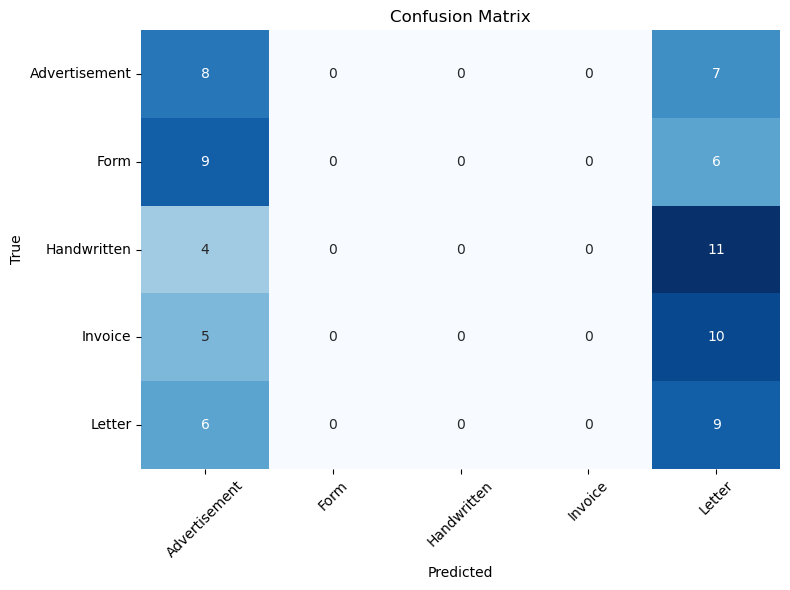


🎯 Overall Accuracy: 22.67%

🏆 Per-Class Accuracy:
Advertisement  : 53.33%
Form           : 0.00%
Handwritten    : 0.00%
Invoice        : 0.00%
Letter         : 60.00%


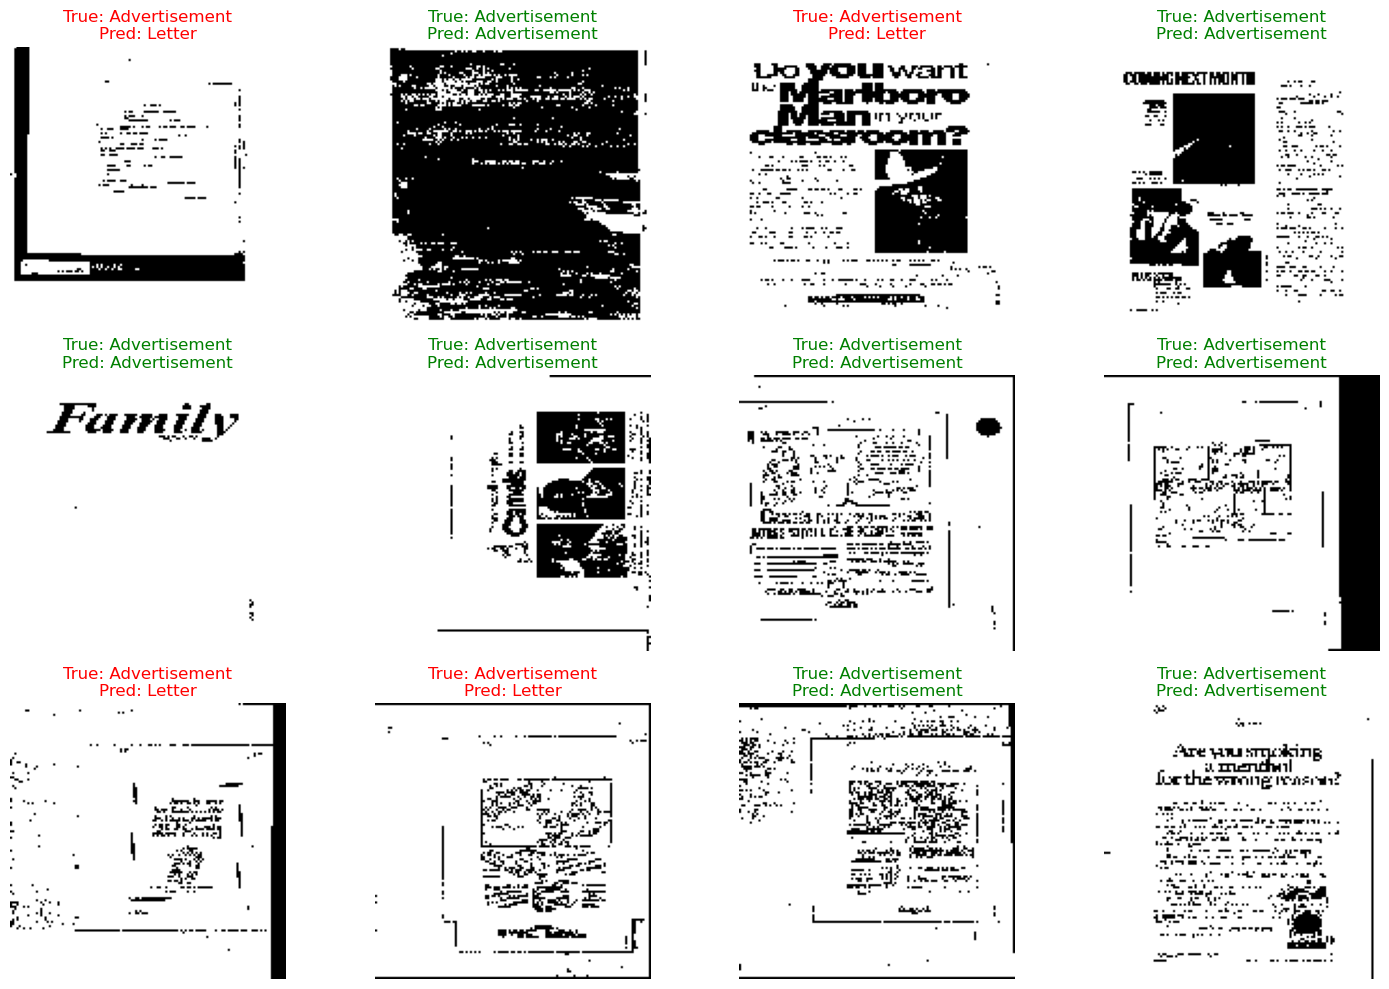

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('final_model.h5')  # or 'best_model.h5' if you used ModelCheckpoint

# Prepare test data (assuming same structure as training)
def load_test_data():
    X_test, y_test = [], []
    for cls_idx, cls in enumerate(CLASSES):
        cls_dir = f'{PROCESSED_DIR}/val/{cls}'  # or 'val' if you're evaluating on validation set
        for fname in os.listdir(cls_dir):
            X_test.append(np.load(os.path.join(cls_dir, fname)))
            y_test.append(cls_idx)
    return np.expand_dims(np.array(X_test), -1), np.array(y_test)

X_test, y_test = load_test_data()

# Make predictions
y_pred = model.predict(X_test).argmax(axis=1)
y_prob = model.predict(X_test)

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=CLASSES, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=CLASSES, yticklabels=CLASSES,
            cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"\n🎯 Overall Accuracy: {accuracy:.2%}")

# Per-Class Accuracy
class_acc = {}
for i, cls in enumerate(CLASSES):
    class_mask = (y_test == i)
    class_acc[cls] = np.mean(y_pred[class_mask] == y_test[class_mask])

print("\n🏆 Per-Class Accuracy:")
for cls, acc in class_acc.items():
    print(f"{cls:<15}: {acc:.2%}")

# ROC Curve (for binary classification)
if len(CLASSES) == 2:
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Sample Predictions Visualization
plt.figure(figsize=(15, 10))
for i in range(min(12, len(X_test))):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    pred_class = CLASSES[y_pred[i]]
    true_class = CLASSES[y_test[i]]
    color = 'green' if pred_class == true_class else 'red'
    plt.title(f"True: {true_class}\nPred: {pred_class}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Add augmentation

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 32, 32, 3)           │             195 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 1280)                │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,397,803 (16.78 MB)

 Trainable params: 4,355,780 (16.62 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 49s 895ms/step - accuracy: 0.1706 - loss: 2.4773 - val_accuracy: 0.2000 - val_loss: 1.6106
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step - accuracy: 0.1939 - loss: 2.2420 - val_accuracy: 0.2000 - val_loss: 1.6103
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.1887 - loss: 2.1975 - val_accuracy: 0.2000 - val_loss: 1.6135
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step - accuracy: 0.1921 - loss: 2.0703 - val_accuracy: 0.2000 - val_loss: 1.6246
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.2552 - loss: 1.9351 - val_accuracy: 0.2000 - val_loss: 1.6403
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.2016 - loss: 2.0332 - val_accuracy: 0.2000 - val_loss: 1.6568
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - accuracy: 0.1745 - loss: 1.9806 - val_accuracy: 0.2000 - val_loss: 1.6815
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.2258 - loss: 1.8490 - val_accuracy: 0.2000 - val_loss

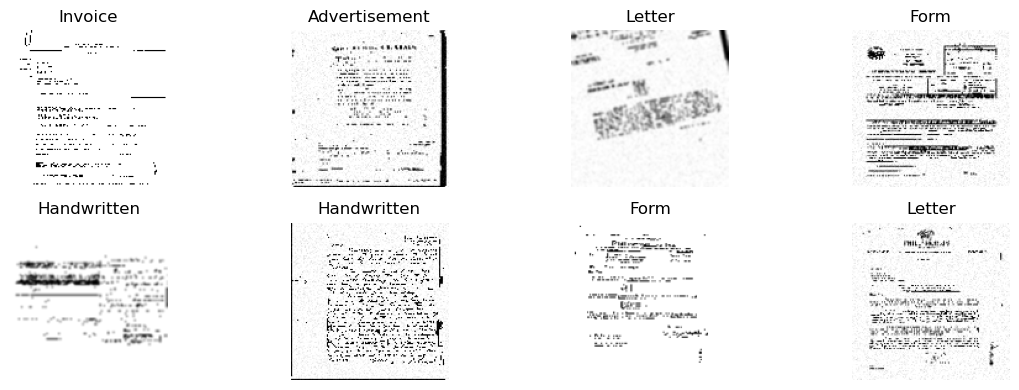

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
import random
import cv2
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Configuration
BATCH_SIZE  = 32
IMG_SIZE    = (128, 128)
EPOCHS      = 50
CLASSES     = ['Advertisement', 'Form', 'Handwritten', 'Invoice', 'Letter']
PROCESSED_DIR = 'data_np'

def augment_image(image, label):
    """
    image: tf.Tensor shape (128,128,1)
    label: scalar tf.Tensor
    returns: augmented (128,128,1) float32 image, same label
    """
    # to numpy 2D float32 [0,1]
    img = image.numpy().squeeze().astype(np.float32)
    h, w = img.shape

    # 1) rotation
    if random.random() > 0.5:
        angle = random.uniform(-15, 15)
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
        img = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT)

    # 2) zoom
    if random.random() > 0.5:
        zoom = random.uniform(0.9, 1.1)
        zh, zw = int(h*zoom), int(w*zoom)
        resized = cv2.resize(img, (zw, zh), interpolation=cv2.INTER_LINEAR)
        if zoom < 1.0:
            # pad back
            dy = (h - zh) // 2
            dx = (w - zw) // 2
            img = cv2.copyMakeBorder(resized, dy, h-zh-dy, dx, w-zw-dx, cv2.BORDER_REFLECT)
        else:
            # crop center
            y0 = (zh - h) // 2
            x0 = (zw - w) // 2
            img = resized[y0:y0+h, x0:x0+w]

    # 3) brightness
    if random.random() > 0.5:
        factor = random.uniform(0.8, 1.2)
        img = np.clip(img * factor, 0, 1)

    # 4) noise
    if random.random() > 0.5:
        noise = np.random.normal(0, 0.05, (h, w))
        img = np.clip(img + noise, 0, 1)

    # 5) blur
    if random.random() > 0.5:
        img = cv2.GaussianBlur(img, (3, 3), 0)

    # back to (128,128,1)
    img = img.astype(np.float32)[..., np.newaxis]
    return img, label

def create_dataset(split, augment=False):
    X, y = [], []
    for idx, cls in enumerate(CLASSES):
        cls_dir = os.path.join(PROCESSED_DIR, split, cls)
        for fname in os.listdir(cls_dir):
            arr = np.load(os.path.join(cls_dir, fname))
            X.append(arr)
            y.append(idx)
    X = np.expand_dims(np.array(X, dtype=np.float32), -1)  # (N,128,128,1)
    y = np.array(y, dtype=np.int32)                        # (N,)

    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if augment:
        ds = ds.map(
            lambda x, y: tf.py_function(
                func=augment_image,
                inp=[x, y],
                Tout=(tf.float32, tf.int32)
            ),
            num_parallel_calls=tf.data.AUTOTUNE
        ).map(
            # restore static shapes
            lambda x, y: (
                tf.ensure_shape(x, IMG_SIZE + (1,)),
                tf.ensure_shape(y, [])
            ),
            num_parallel_calls=tf.data.AUTOTUNE
        )

    return ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Prepare datasets
train_ds = create_dataset('train', augment=True)
val_ds   = create_dataset('val',   augment=False)

# Compute class weights
train_labels = []
for i, cls in enumerate(CLASSES):
    n = len(os.listdir(os.path.join(PROCESSED_DIR, 'train', cls)))
    train_labels += [i] * n
weights = compute_class_weight('balanced',
                               classes=np.arange(len(CLASSES)),
                               y=train_labels)
class_weights = dict(enumerate(weights))

# Build model
def build_model():
    inp = layers.Input((*IMG_SIZE, 1))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inp)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)

    # project to 3-channel
    x = layers.Conv2D(3, 1, padding='same')(x)

    # EfficientNetB0 backbone
    x = tf.keras.applications.EfficientNetB0(
        input_shape=(32, 32, 3),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(len(CLASSES), activation='softmax')(x)

    m = models.Model(inp, out)
    m.compile(
        optimizer=tf.keras.optimizers.Adam(1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return m

model = build_model()
model.summary()

# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    class_weight=class_weights,
    verbose=1
)

#model.save('augmented_model.h5')
model.save('augmented_model.keras')

# Quick viz of a few augmentations
def show_augmented_samples():
    sample = create_dataset('train', augment=True).unbatch().take(8)
    plt.figure(figsize=(12,4))
    for i, (img, lbl) in enumerate(sample):
        plt.subplot(2,4,i+1)
        plt.imshow(img.numpy().squeeze(), cmap='gray')
        plt.title(CLASSES[int(lbl.numpy())])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_augmented_samples()
